In [1]:
from indextracking import create_portfolio
from data import build_dataset
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Define index and stock tickers
bvsp_index_ticker = '^BVSP'
bvsp_stock_tickers = [
  "ALOS3.SA", "ALPA4.SA", "ABEV3.SA", "ASAI3.SA", "AURE3.SA", "AZUL4.SA", "AZZA3.SA",
  "B3SA3.SA", "BBSE3.SA", "BBDC3.SA", "BBDC4.SA", "BRAP4.SA", "BBAS3.SA", "BRKM5.SA",
  "BRAV3.SA", "BRFS3.SA", "BPAC11.SA", "CXSE3.SA", "CRFB3.SA", "CCRO3.SA", "CMIG4.SA",
  "COGN3.SA", "CPLE6.SA", "CSAN3.SA", "CPFE3.SA", "CMIN3.SA", "CVCB3.SA", "CYRE3.SA",
  "ELET3.SA", "ELET6.SA", "EMBR3.SA", "ENGI11.SA", "ENEV3.SA", "EGIE3.SA", "EQTL3.SA",
  "EZTC3.SA", "FLRY3.SA", "GGBR4.SA", "GOAU4.SA", "NTCO3.SA", "HAPV3.SA", "HYPE3.SA",
  "IGTI11.SA", "IRBR3.SA", "ITSA4.SA", "ITUB4.SA", "JBSS3.SA", "KLBN11.SA", "RENT3.SA",
  "LREN3.SA", "LWSA3.SA", "MGLU3.SA", "MRFG3.SA", "BEEF3.SA", "MRVE3.SA", "MULT3.SA",
  "PCAR3.SA", "PETR3.SA", "PETR4.SA", "RECV3.SA", "PRIO3.SA", "PETZ3.SA", "RADL3.SA",
  "RAIZ4.SA", "RDOR3.SA", "RAIL3.SA", "SBSP3.SA", "SANB11.SA", "STBP3.SA", "SMTO3.SA",
  "CSNA3.SA", "SLCE3.SA", "SUZB3.SA", "TAEE11.SA", "VIVT3.SA", "TIMS3.SA", "TOTS3.SA",
  "TRPL4.SA", "UGPA3.SA", "USIM5.SA", "VALE3.SA", "VAMO3.SA", "VBBR3.SA", "VIVA3.SA",
  "WEGE3.SA", "YDUQ3.SA"
]

sp100_index_ticker = '^OEX'
sp100_stock_tickers = [
    'AAPL', 'ABBV', 'ABT', 'ACN', 'ADBE', 'AIG', 'AMD', 'AMGN', 'AMT', 'AMZN',
    'AVGO', 'AXP', 'BA', 'BAC', 'BK', 'BKNG', 'BLK', 'BMY', 'C', 'CAT',
    'CHTR', 'CL', 'CMCSA', 'COF', 'COP', 'COST', 'CRM', 'CSCO', 'CVS', 'CVX',
    'DHR', 'DIS', 'DOW', 'DUK', 'EMR', 'EXC', 'F', 'FDX', 'GD', 'GE',
    'GILD', 'GM', 'GOOG', 'GOOGL', 'GS', 'HD', 'HON', 'IBM', 'INTC', 'JNJ',
    'JPM', 'KHC', 'KO', 'LLY', 'LMT', 'LOW', 'MA', 'MCD', 'MDLZ', 'MDT',
    'MET', 'META', 'MMM', 'MO', 'MRK', 'MS', 'MSFT', 'NEE', 'NFLX', 'NKE',
    'NVDA', 'ORCL', 'PEP', 'PFE', 'PG', 'PM', 'PYPL', 'QCOM', 'RTX', 'SBUX',
    'SCHW', 'SO', 'SPG', 'T', 'TGT', 'TMO', 'TMUS', 'TSLA', 'TXN', 'UNH',
    'UNP', 'UPS', 'USB', 'V', 'VZ', 'WBA', 'WFC', 'WMT'
]

start_date_dataset = "2018-01-01"
end_date_dataset = "2024-12-01"

build_dataset(sp100_index_ticker, sp100_stock_tickers, start_date_dataset, end_date_dataset)
build_dataset(bvsp_index_ticker, bvsp_stock_tickers, start_date_dataset, end_date_dataset)

In [4]:
def download(index_ticker, stock_tickers, start_date, end_date):
    values, data = build_dataset(index_ticker, stock_tickers, start_date, end_date)

    index_data = data[index_ticker]
    stocks_data = data.drop(columns=[index_ticker])
    
    index_values = values[index_ticker]
    stock_values = values.drop(columns=[index_ticker])

    return stocks_data, index_data, stock_values, index_values

In [5]:
# Build dataset from choosen tickers
x_sp100_data_train, y_sp100_data_train, x_sp100_values_train, y_sp100_values_train = download(sp100_index_ticker, sp100_stock_tickers, start_date_train, end_date_train)
x_bvsp_data_train, y_bvsp_data_train, x_bvsp_values_train, y_bvsp_values_train = download(bvsp_index_ticker, bvsp_stock_tickers, start_date_train, end_date_train)

x_sp100_data_test, y_sp100_data_test, x_sp100_values_test, y_sp100_values_test = download(sp100_index_ticker, sp100_stock_tickers, start_date_test, end_date_test)
x_bvsp_data_test, y_bvsp_data_test, x_bvsp_values_test, y_bvsp_values_test = download(bvsp_index_ticker, bvsp_stock_tickers, start_date_test, end_date_test)    

[*********************100%***********************]  99 of 99 completed


Data downloaded successfully.
Removed stocks: set()
Data cleaned successfully.
Stock returns saved to stock_returns_^OEX_2023-01-01_to_2023-06-01.csv


[*********************100%***********************]  87 of 87 completed

2 Failed downloads:
['BRAV3.SA', 'ALOS3.SA']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2023-01-01 00:00:00+00:00 -> 2023-06-01 00:00:00+00:00) (Yahoo error = "Data doesn\'t exist for startDate = 1672531200, endDate = 1685577600")')


Data downloaded successfully.
Removed stocks: {'ALOS3.SA', 'BRAV3.SA'}
Data cleaned successfully.
Stock returns saved to stock_returns_^BVSP_2023-01-01_to_2023-06-01.csv


[*********************100%***********************]  99 of 99 completed

9 Failed downloads:
['KHC', 'MRK', 'AMD', 'MMM', 'BMY', 'CMCSA']: ReadTimeout(ReadTimeoutError("HTTPSConnectionPool(host='query2.finance.yahoo.com', port=443): Read timed out. (read timeout=10)"))
['ORCL', 'PG', 'KO']: ConnectionError(ReadTimeoutError("HTTPSConnectionPool(host='query2.finance.yahoo.com', port=443): Read timed out."))


Data downloaded successfully.
Removed stocks: {'CMCSA', 'KO', 'ORCL', 'MMM', 'KHC', 'MRK', 'BMY', 'PG', 'AMD'}
Data cleaned successfully.
Stock returns saved to stock_returns_^OEX_2023-06-01_to_2024-01-01.csv


[*********************100%***********************]  87 of 87 completed

1 Failed download:
['BRAV3.SA']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2023-06-01 00:00:00+00:00 -> 2024-01-01 00:00:00+00:00) (Yahoo error = "Data doesn\'t exist for startDate = 1685577600, endDate = 1704067200")')


Data downloaded successfully.
Removed stocks: {'ALOS3.SA', 'BRAV3.SA'}
Data cleaned successfully.
Stock returns saved to stock_returns_^BVSP_2023-06-01_to_2024-01-01.csv


In [28]:
portfolio_sp100 = create_portfolio(x_sp100_data_train, y_sp100_data_train, portfolio_size=25, max_iterations=10000000)

Set parameter IterationLimit to value 10000000
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: Intel(R) Core(TM) i5-7400 CPU @ 3.00GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 4 logical processors, using up to 4 threads

Non-default parameters:
IterationLimit  10000000

Optimize a model with 100 rows, 196 columns and 392 nonzeros
Model fingerprint: 0x9e857057
Model has 4851 quadratic objective terms
Variable types: 98 continuous, 98 integer (98 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-05, 5e-04]
  QObjective range [2e-07, 4e-03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
Found heuristic solution: objective 0.0001821
Presolve time: 0.00s
Presolved: 100 rows, 196 columns, 392 nonzeros
Presolved model has 4851 quadratic objective terms
Variable types: 98 continuous, 98 integer (98 binary)

Root relaxation: objective 9.474085e-08, 641 iterations, 0.

In [29]:
portfolio_bvsp = create_portfolio(x_bvsp_data_train, y_bvsp_data_train, portfolio_size=25, max_iterations=10000000)

Set parameter IterationLimit to value 10000000
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: Intel(R) Core(TM) i5-7400 CPU @ 3.00GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 4 logical processors, using up to 4 threads

Non-default parameters:
IterationLimit  10000000

Optimize a model with 86 rows, 168 columns and 336 nonzeros
Model fingerprint: 0x08997f31
Model has 3570 quadratic objective terms
Variable types: 84 continuous, 84 integer (84 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-05, 6e-04]
  QObjective range [2e-08, 1e-02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
Found heuristic solution: objective 0.0003106
Presolve time: 0.00s
Presolved: 86 rows, 168 columns, 336 nonzeros
Presolved model has 3570 quadratic objective terms
Variable types: 84 continuous, 84 integer (84 binary)

Root relaxation: objective 7.594342e-07, 517 iterations, 0.00

In [60]:
portfolio_bvsp_sorted = sorted(portfolio_bvsp.items(), key=lambda item: float(item[1]), reverse=True)

print("portfolio bvsp:")
for key, value in portfolio_bvsp_sorted:
    print(f"{key}: {float(value):.4f}")

print(f"\nportfolio bvsp length: {len(portfolio_bvsp)}")

portfolio bvsp:
VALE3.SA: 0.1623
PETR4.SA: 0.1294
ITUB4.SA: 0.0996
TRPL4.SA: 0.0580
BPAC11.SA: 0.0527
EQTL3.SA: 0.0435
ELET3.SA: 0.0421
CSAN3.SA: 0.0410
BBDC3.SA: 0.0372
RAIL3.SA: 0.0309
JBSS3.SA: 0.0307
VIVT3.SA: 0.0291
ABEV3.SA: 0.0288
RADL3.SA: 0.0281
WEGE3.SA: 0.0252
LREN3.SA: 0.0241
GGBR4.SA: 0.0236
SBSP3.SA: 0.0231
KLBN11.SA: 0.0205
CMIN3.SA: 0.0170
VAMO3.SA: 0.0127
HAPV3.SA: 0.0119
YDUQ3.SA: 0.0112
MGLU3.SA: 0.0088
CVCB3.SA: 0.0085

portfolio bvsp length: 25


In [61]:
portfolio_sp100_sorted = sorted(portfolio_sp100.items(), key=lambda item: float(item[1]), reverse=True)

print("portfolio sp100:")
for key, value in portfolio_sp100_sorted:
    print(f"{key}: {float(value):.4f}")

print(f"\nportfolio bvsp length: {len(portfolio_sp100)}")

portfolio sp100:
AAPL: 0.1275
MSFT: 0.0910
PG: 0.0690
GD: 0.0550
GOOGL: 0.0528
AMZN: 0.0491
MA: 0.0450
TMO: 0.0437
KHC: 0.0433
JNJ: 0.0398
PM: 0.0389
JPM: 0.0386
HD: 0.0348
PFE: 0.0324
COP: 0.0318
NVDA: 0.0306
MET: 0.0257
AVGO: 0.0237
NFLX: 0.0225
META: 0.0203
SBUX: 0.0202
TSLA: 0.0199
BA: 0.0172
QCOM: 0.0161
SCHW: 0.0108

portfolio bvsp length: 25


In [86]:
def plot_portfolio(portfolio, stocks_data, index_data, start_date, end_date, index_name):
    a = [key for key in portfolio if key in stocks_data.columns]
    portfolio_data = stocks_data[a]
    
    weights = pd.Series(portfolio).reindex(a).values
    
    scaler = MinMaxScaler()
    
    portfolio_data_filtered = (portfolio_data * weights).sum(axis=1).loc[start_date:end_date]
    portfolio_data_normalized = scaler.fit_transform(portfolio_data_filtered.values.reshape(-1, 1))
    
    index_data_filtered = index_data.loc[start_date:end_date]
    index_data_normalized = scaler.fit_transform(index_data_filtered.values.reshape(-1, 1))
    
    start_date_str = pd.to_datetime(start_date).strftime('%Y-%m-%d')
    end_date_str = pd.to_datetime(end_date).strftime('%Y-%m-%d')
    
    fig = plt.figure(figsize=(15, 8))
    eixo = fig.add_axes([0, 0, 1, 1])
    
    eixo.plot(index_data_filtered.index, index_data_normalized, color='red', linestyle='-', linewidth=3, label=index_name)
    eixo.plot(portfolio_data_filtered.index, portfolio_data_normalized, color='blue', linewidth=1, label="Portfolio")
    
    eixo.set_title(f"Portfolio 25 stocks {index_name}: {start_date_str} to {end_date_str}", fontsize=25, pad=20)
    eixo.legend(title="Indicador", loc='upper left', fontsize=15)
    eixo.set_ylabel('Normalized Value', fontsize=20)
    eixo.set_xlabel('Data', fontsize=20)
    eixo.grid(True)

In [87]:
def plot_portfolio_variance(portfolio, stocks_data, index_data, start_date, end_date, index_name):
    a = [key for key in portfolio if key in stocks_data.columns]
    portfolio_data = stocks_data[a]
    
    weights = pd.Series(portfolio).reindex(a).values
    
    portfolio_data_filtered = (portfolio_data * weights).sum(axis=1).loc[start_date:end_date]
    
    index_data_filtered = index_data.loc[start_date:end_date]
    
    start_date_str = pd.to_datetime(start_date).strftime('%Y-%m-%d')
    end_date_str = pd.to_datetime(end_date).strftime('%Y-%m-%d')
    
    fig = plt.figure(figsize=(15, 8))
    eixo = fig.add_axes([0, 0, 1, 1])
    
    eixo.plot(index_data_filtered.index, index_data_filtered, color='red', linestyle='-', linewidth=3, label=index_name)
    eixo.plot(portfolio_data_filtered.index, portfolio_data_filtered, color='blue', linewidth=1, label="Portfolio")
    
    eixo.set_title(f"Portfolio 25 stocks {index_name}: {start_date_str} to {end_date_str}", fontsize=25, pad=20)
    eixo.legend(title="Indicador", loc='upper left', fontsize=15)
    eixo.set_ylabel('Variance', fontsize=20)
    eixo.set_xlabel('Data', fontsize=20)
    eixo.grid(True)

## Values

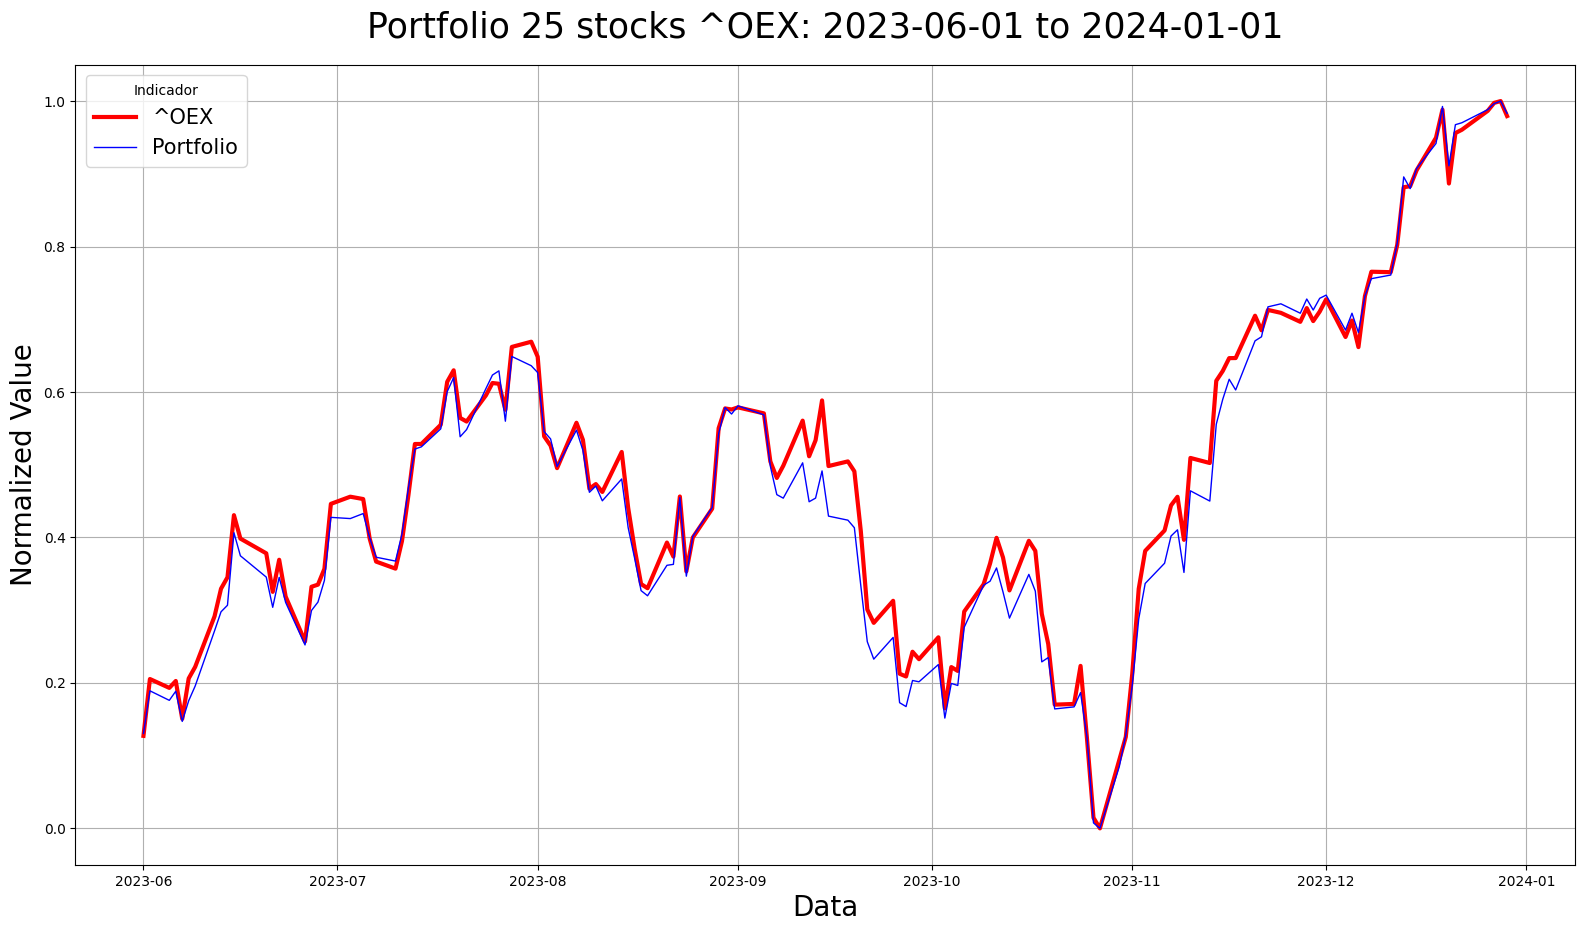

In [88]:
plot_portfolio(portfolio_sp100, x_sp100_values_test, y_sp100_values_test, start_date_test, end_date_test, sp100_index_ticker)

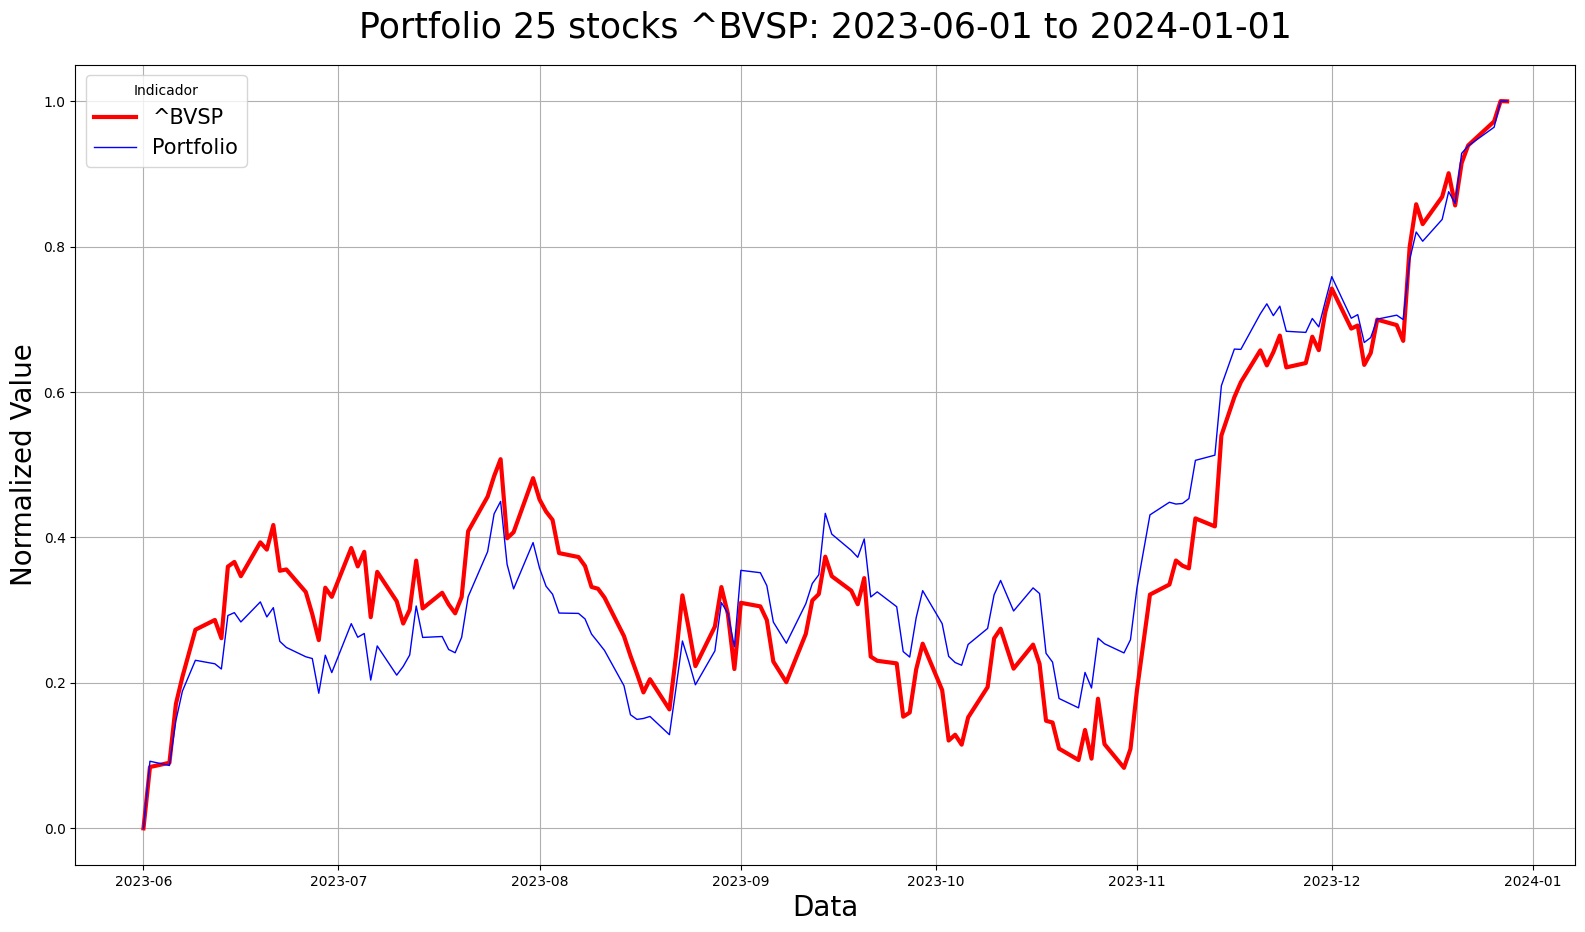

In [89]:
plot_portfolio(portfolio_bvsp, x_bvsp_values_test, y_bvsp_values_test, start_date_test, end_date_test, bvsp_index_ticker)

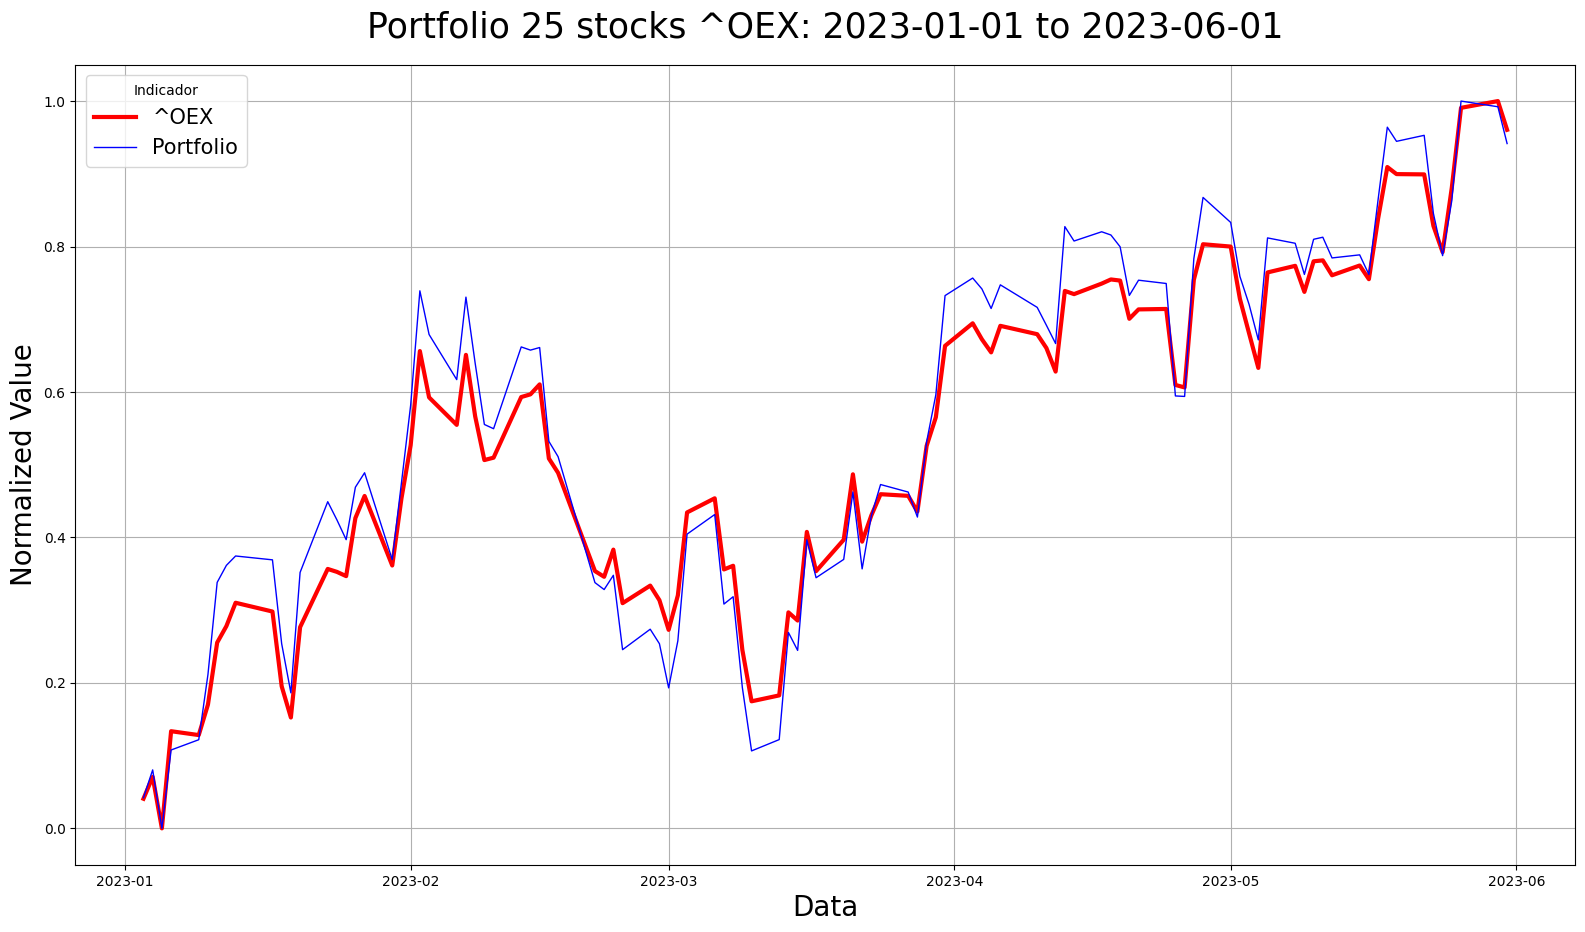

In [90]:
plot_portfolio(portfolio_sp100, x_sp100_values_train, y_sp100_values_train, start_date_train, end_date_train, sp100_index_ticker)

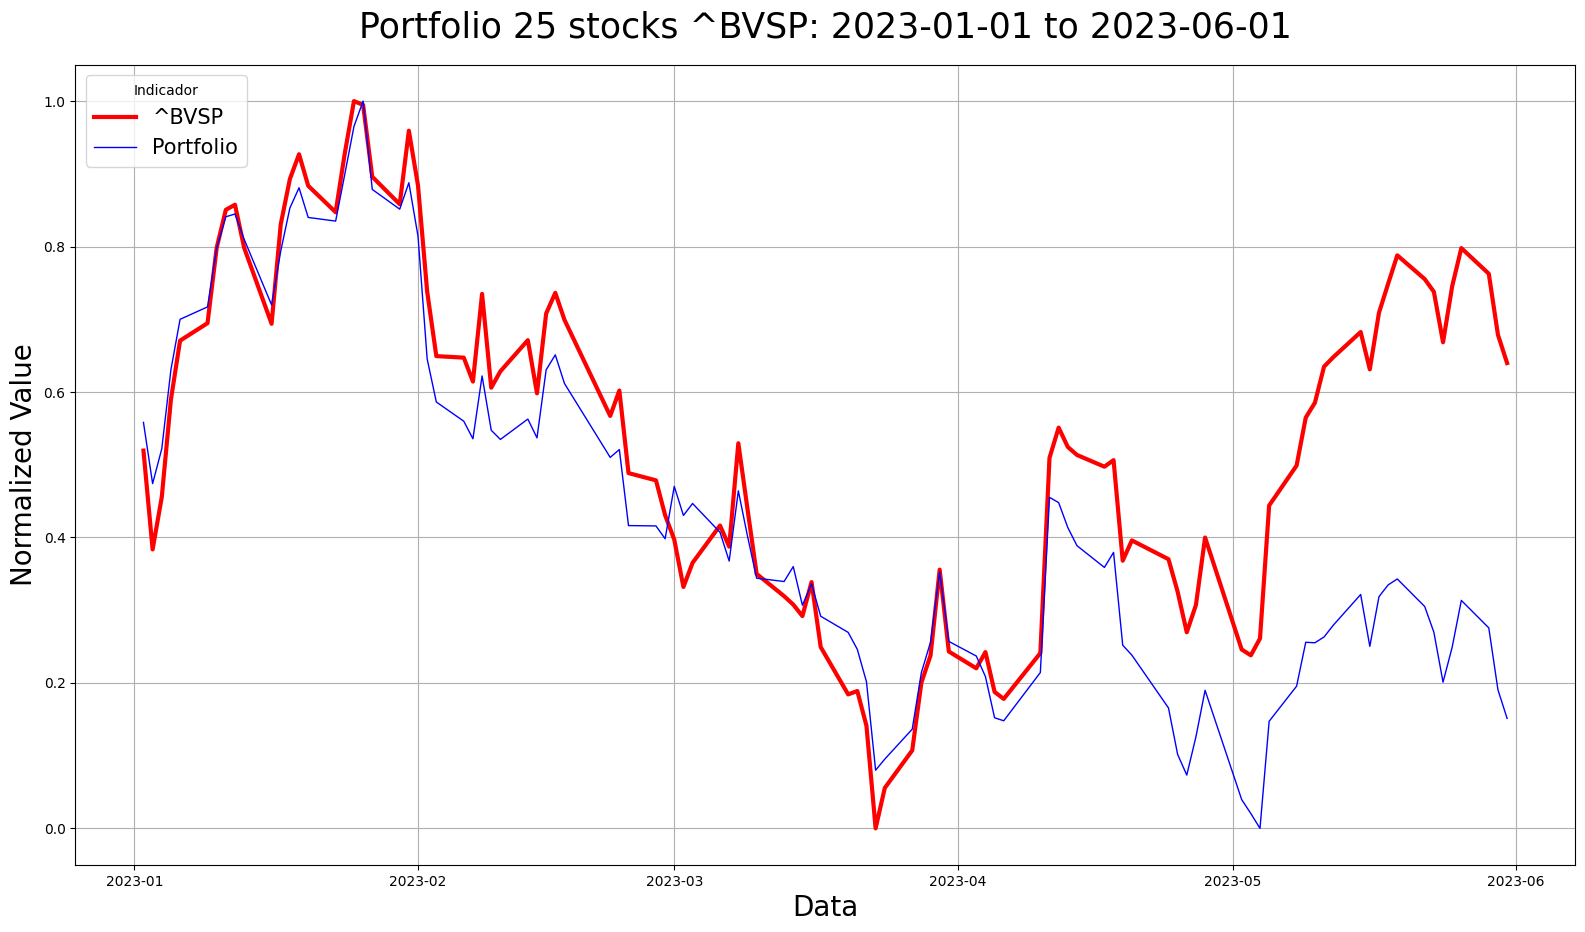

In [91]:
plot_portfolio(portfolio_bvsp, x_bvsp_values_train, y_bvsp_values_train, start_date_train, end_date_train, bvsp_index_ticker)

## Variance plots:

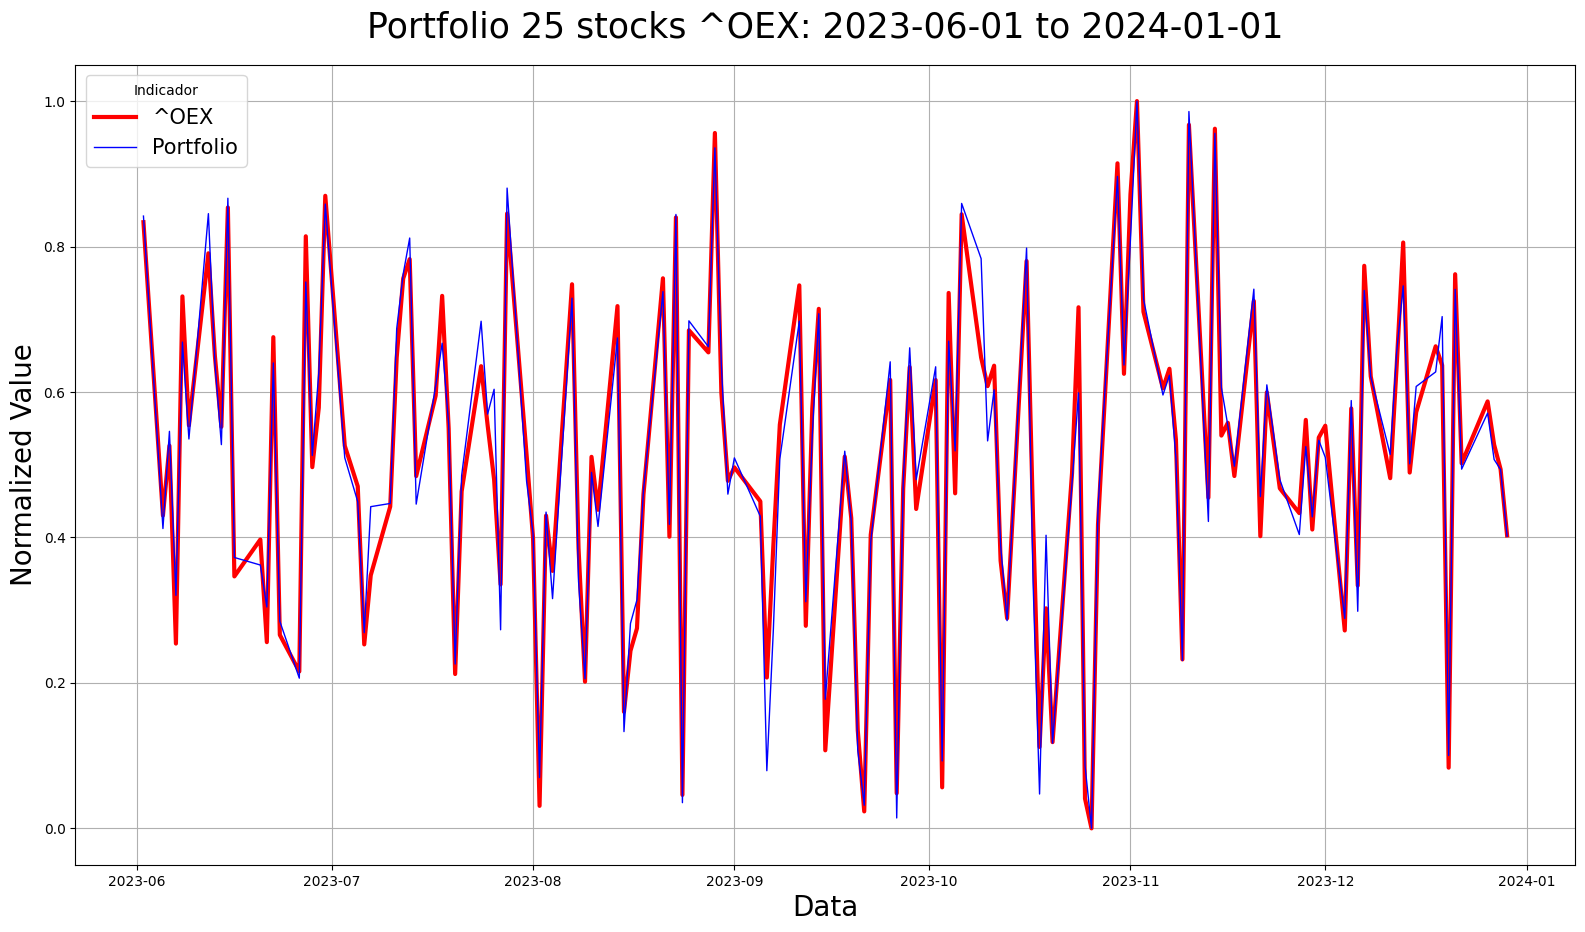

In [92]:
plot_portfolio(portfolio_sp100, x_sp100_data_test, y_sp100_data_test, start_date_test, end_date_test, sp100_index_ticker)

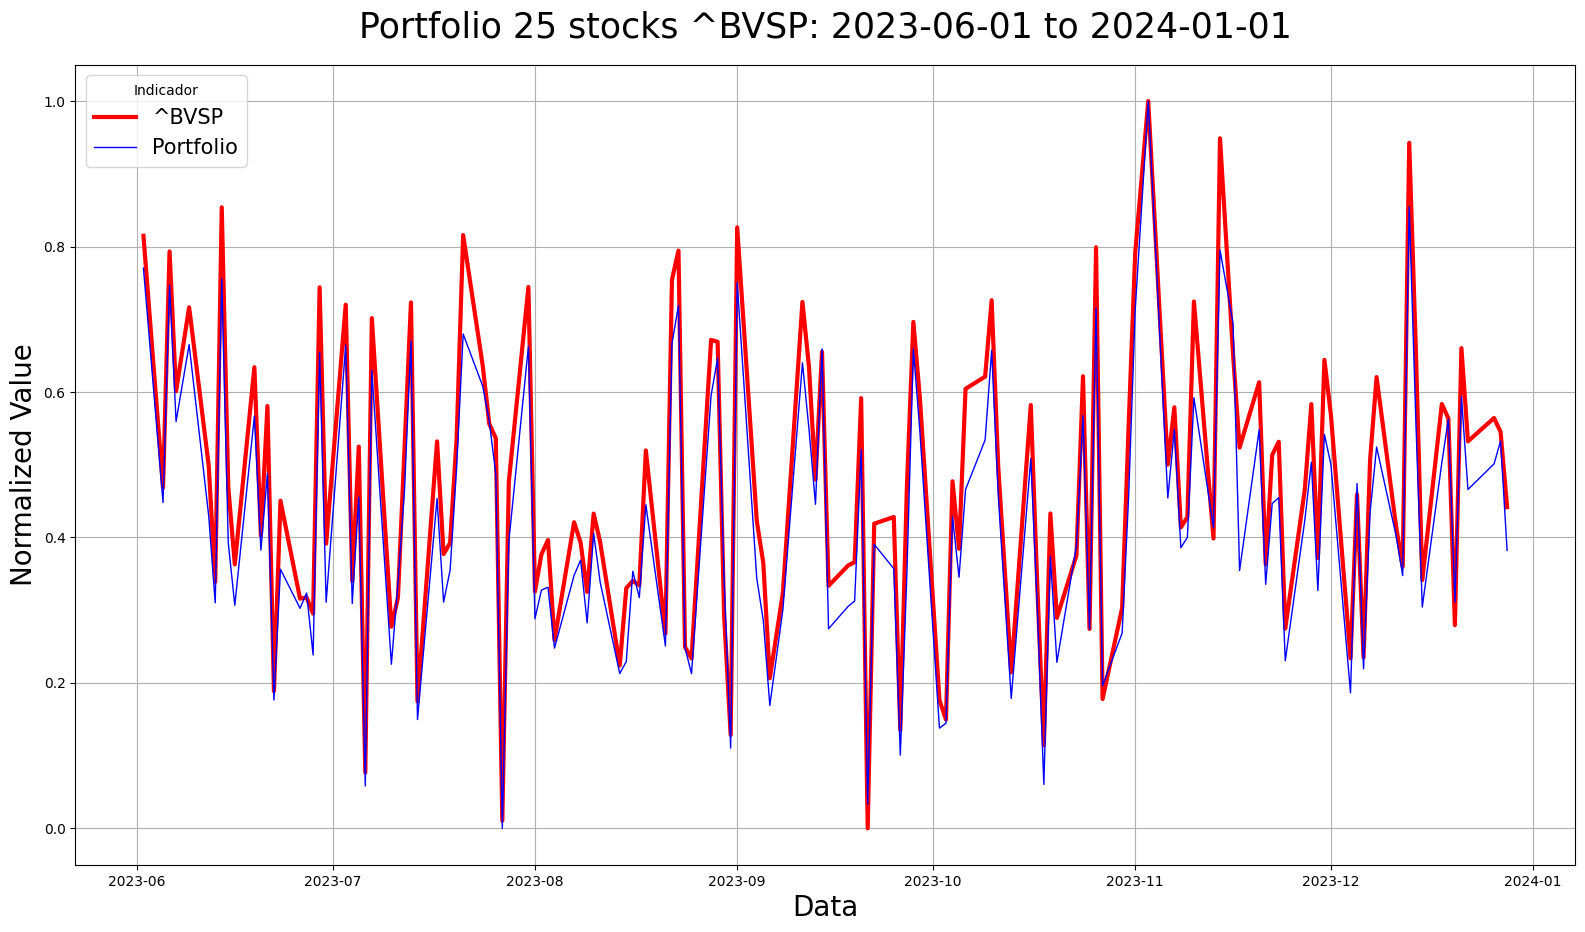

In [93]:
plot_portfolio(portfolio_bvsp, x_bvsp_data_test, y_bvsp_data_test, start_date_test, end_date_test, bvsp_index_ticker)

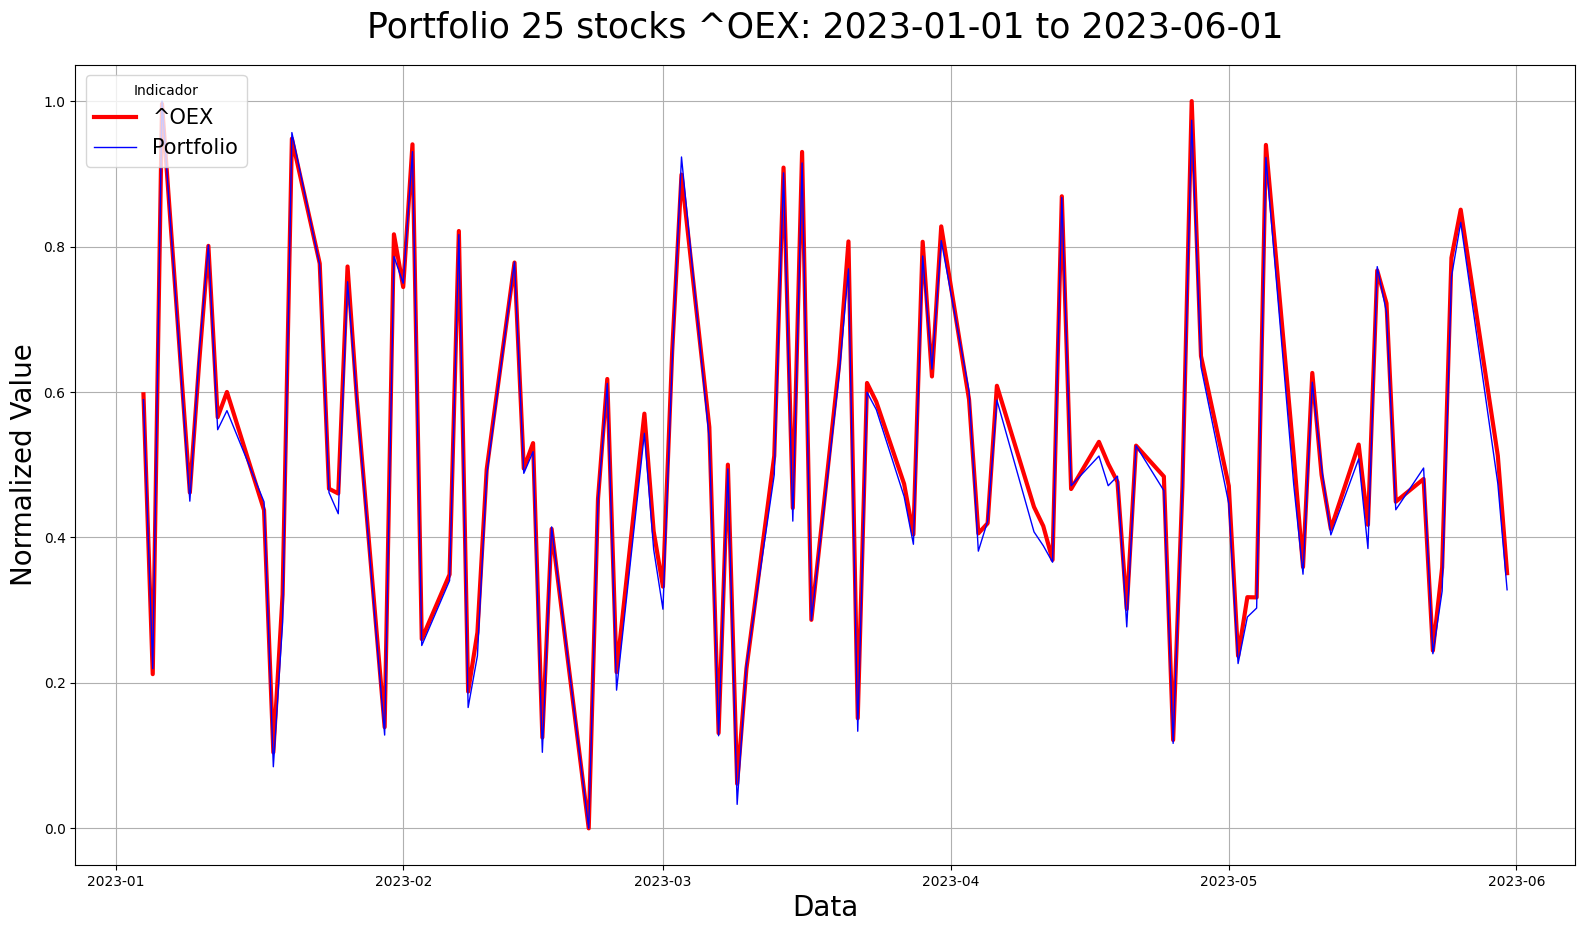

In [94]:
plot_portfolio(portfolio_sp100, x_sp100_data_train, y_sp100_data_train, start_date_train, end_date_train, sp100_index_ticker)

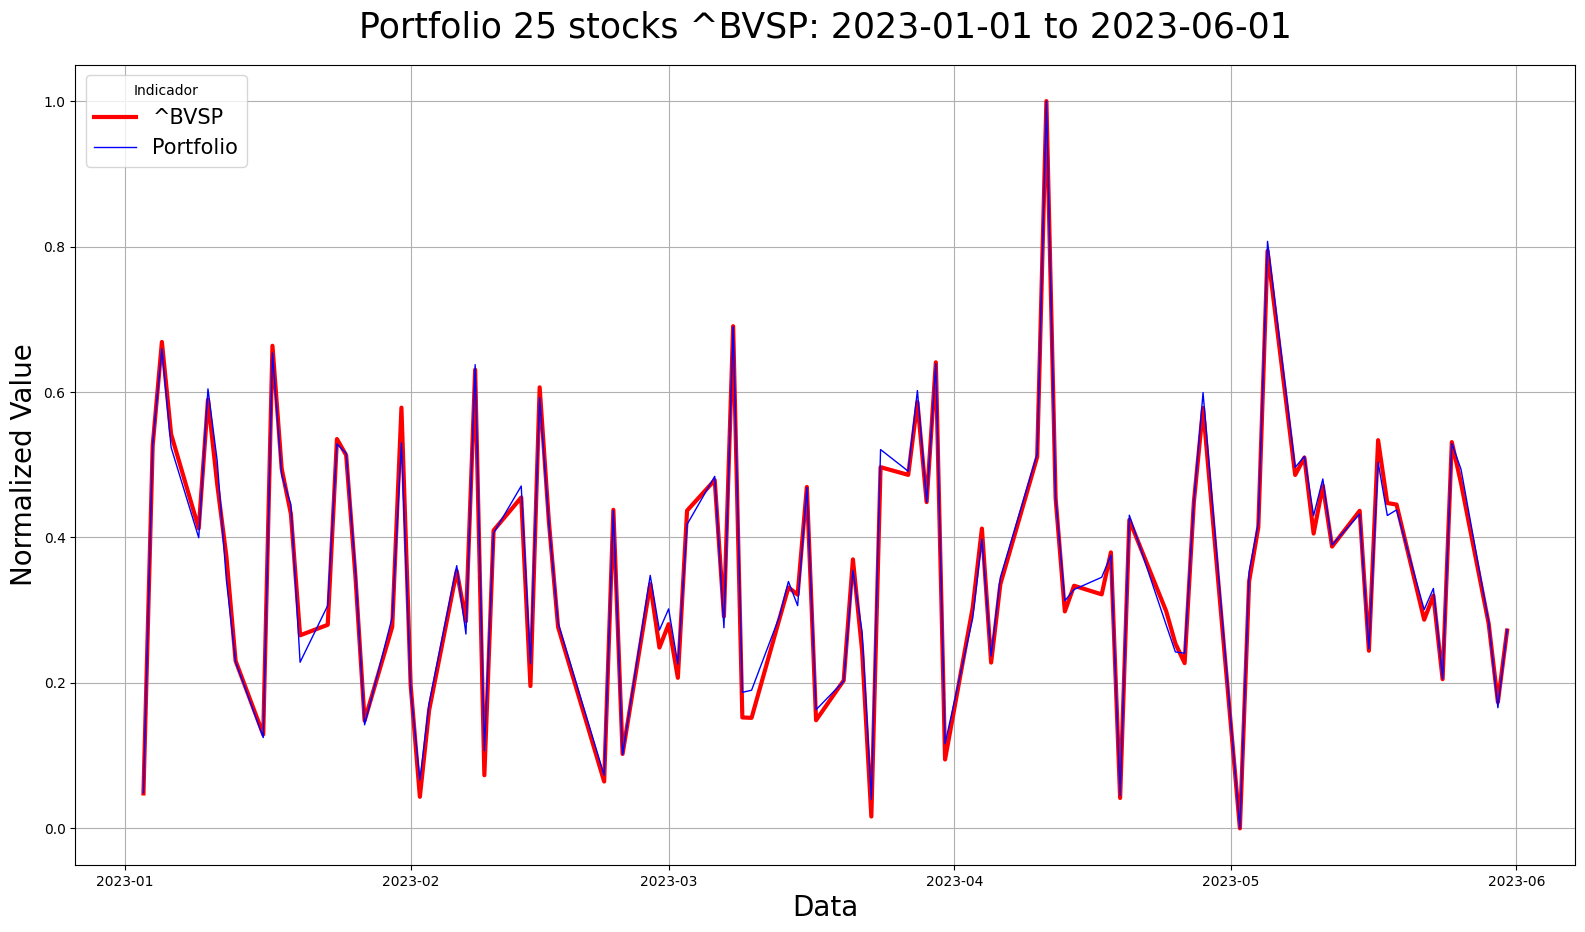

In [95]:
plot_portfolio(portfolio_bvsp, x_bvsp_data_train, y_bvsp_data_train, start_date_train, end_date_train, bvsp_index_ticker)